![image.png](https://i.ibb.co/hg2Kd1X/seabornlogo.png)

Seaborn is a library for making statistical graphics in Python. It builds on top of matplotlib and integrates closely with pandas data structures.

Seaborn helps you explore and understand your data. Its plotting functions operate on dataframes and arrays containing whole datasets and internally perform the necessary semantic mapping and statistical aggregation to produce informative plots. Its dataset-oriented, declarative API lets you focus on what the different elements of your plots mean, rather than on the details of how to draw them

[Seaborn Source 01](https://seaborn.pydata.org/introduction.html), [Seaborn Source 02](https://seaborn.pydata.org/), [Seaborn Source 03](https://www.youtube.com/watch?v=GcXcSZ0gQps), [Seaborn Source 04](https://www.youtube.com/watch?v=6GUZXDef2U0) & [Seaborn Source 05](https://www.youtube.com/watch?v=Pkvdc2Z6eBg)

<a id="toc"></a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">CONTENT</p>

* [IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK](#0)
* [COUNTPLOT](#1)
    * ["hue" Parameter](#1.1)
    * [Extra Information](#1.2)
* [BARPLOT](#2)
    * ["ci" Parameter](#2.1)
    * ["estimator" Parameter](#2.2)    
* [BOXPLOT](#3)
    * ["width" Parameter](#3.1)
    * [Optional Boxplot Examples](#3.2)
    * ["orient" Parameter](#3.3)
    * [Changing x & y](#3.4)
* [VIOLINPLOT](#4)
    * [Optionel Violinplot Example](#4.1)
    * ["split" Parameter](#4.2)
    * ["inner" Parameter](#4.3)
    * ["bandwidth" Parameter](#4.4)
    * [Changing x & y](#4.5)
* [SWARMPLOT](#5) 
    * [Optional Swarmplot Example](#5.1)
    * ["dodge" Parameter](#5.2)
* [BOXENPLOT (LETTER-VALUE PLOT)](#6)        
* [LINEPLOT](#7)
* [THE END OF THE SEABORN SESSION 02](#8)    

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">IMPORTING LIBRARIES NEEDED IN THIS NOTEBOOK</p>

<a id="0"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy
import seaborn as sns

import warnings
warnings.filterwarnings('ignore') 

In [2]:
print(sns.get_dataset_names())

['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'exercise', 'flights', 'fmri', 'gammas', 'geyser', 'iris', 'mpg', 'penguins', 'planets', 'taxis', 'tips', 'titanic']


In [6]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.describe(include="all")

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


In [5]:
tips.describe(include=['category'])

,sex,smoker,day,time
count,244,244,244,244
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,157,151,87,176


## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">COUNTPLOT</p>

<a id="1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A simple plot, it merely shows the total count of rows per category. 

In [8]:
tips['day'].value_counts() #default olarak buyukten kucuge siralar

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

<AxesSubplot:xlabel='day', ylabel='count'>

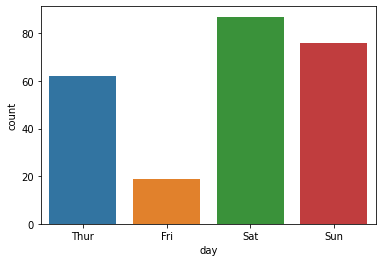

In [9]:
sns.countplot(x="day" , data = tips)

**How to annotate?**

[SOURCE](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.annotate.html)

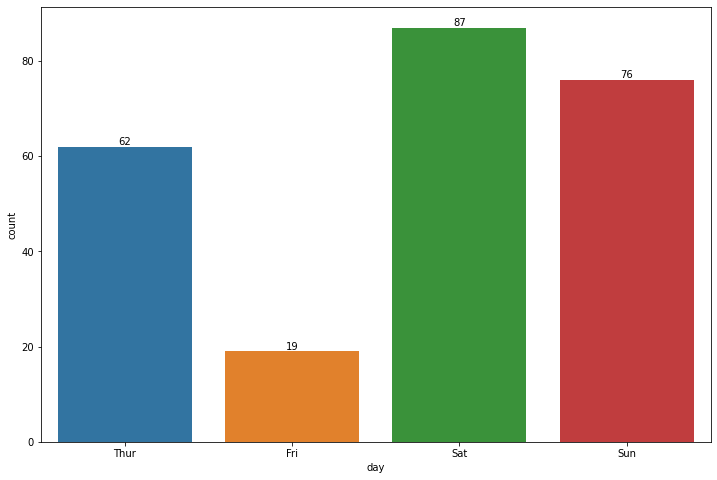

In [10]:
plt.figure(figsize = (12,8))
ax = sns.countplot(x = 'day', data = tips)
ax.bar_label(ax.containers[0]);

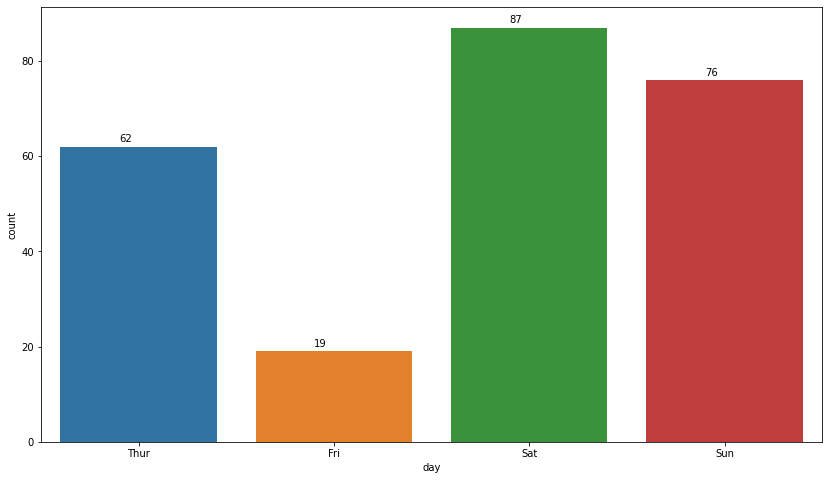

In [13]:
fig, ax = plt.subplots(figsize=(14,8))
ax = sns.countplot(x='day', data=tips)
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.3, p.get_height()+1));

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"hue" Parameter</p>

<a id="1.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

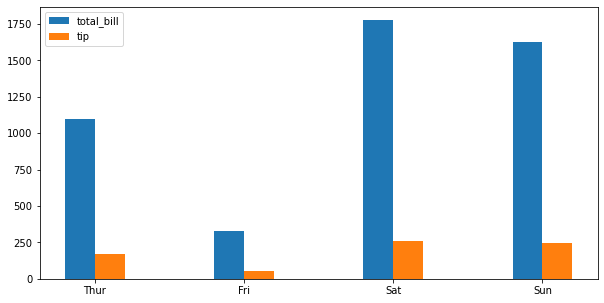

In [14]:
# Optional hard to coding (REMEMBER Matplotlib Session 02)
day = tips.groupby("day").sum().index   # tips.day.unique()
day_of_total_bill= tips.groupby("day")["total_bill"].sum()
day_tip = np.array(tips.groupby("day")["tip"].sum())
fig, ax = plt.subplots(figsize=(10, 5))
p = np.arange(len(day))
width = 0.20
ax.bar(p - width/2, day_of_total_bill, width, label="total_bill")
ax.bar(p + width/2, day_tip,           width, label="tip")
ax.set_xticks(p)
ax.set_xticklabels(day)
plt.legend()
plt.show()

<AxesSubplot:xlabel='day', ylabel='count'>

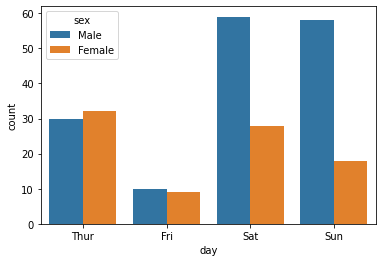

In [15]:
sns.countplot(x = "day" , data=tips , hue = "sex")

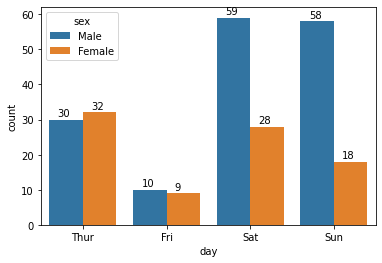

In [16]:
fig, ax = plt.subplots()
ax = sns.countplot(x='day', data=tips, hue="sex")
for p in ax.patches:
    ax.annotate((p.get_height()), (p.get_x()+0.1, p.get_height()+1));

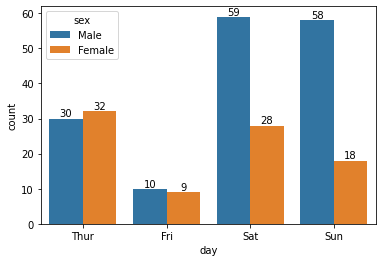

In [17]:
ax=sns.countplot(x="day",data=tips,hue="sex")
for i in ax.containers:
    ax.bar_label(i)   

#### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Extra Information</p>

<a id="1.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [21]:
df = sns.load_dataset("mpg")
df.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


<AxesSubplot:xlabel='origin', ylabel='count'>

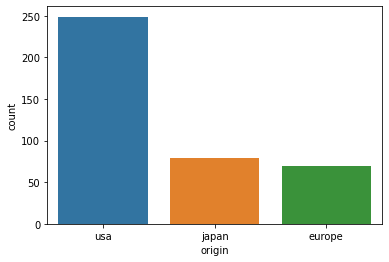

In [22]:
sns.countplot(x="origin" , data = df)

<AxesSubplot:xlabel='model_year', ylabel='count'>

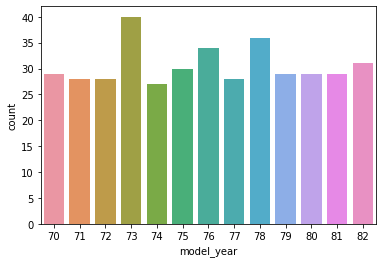

In [23]:
sns.countplot(x="model_year" , data = df)

<AxesSubplot:xlabel='model_year', ylabel='count'>

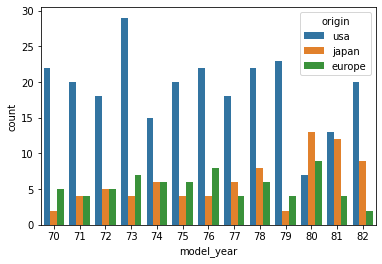

In [25]:
sns.countplot(x="model_year" , data = df , hue="origin")

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BARPLOT</p>

<a id="2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

So far we've seen the y axis default to a count (similar to a .groupby(x_axis).count() call in pandas). We can expand our visualizations by specifying a specific continuous feature for the y-axis. Keep in mind, you should be careful with these plots, as they may imply a relationship continuity along the y axis where there is none

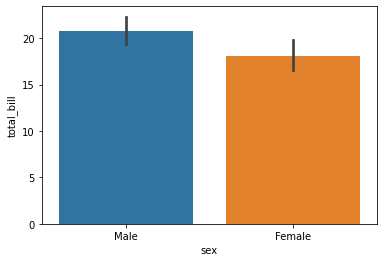

In [26]:
sns.barplot(x = "sex" , y = "total_bill" , data = tips);

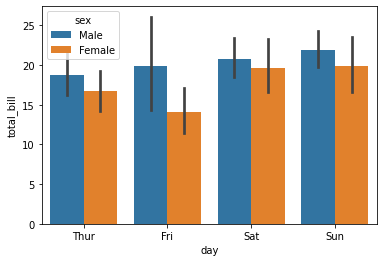

In [29]:
sns.barplot(x = "day" , y = "total_bill" , data = tips, hue="sex");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"ci" Parameter</p>

<a id="2.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [ ]:
sns.barplot(x = "sex" , y = "total_bill" , data = tips, ci="sd"); #default: 95, confidence interval - guven araligi

**Correlation Between Height and Weight**<br>
At the beginning of the Spring 2017 semester a sample of World Campus students were surveyed and asked for their height and weight. In the sample, Pearson's r = 0.487. A 95% confidence interval was computed of [0.410, 0.559].

The correct interpretation of this confidence interval is that we are 95% confident that the correlation between height and weight in the population of all World Campus students is between 0.410 and 0.559.

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"estimator" Parameter</p>

<a id="2.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

"estimator" params (np.mean, np.median, np.sum, np,maz, np.min, np.count_nonzero)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

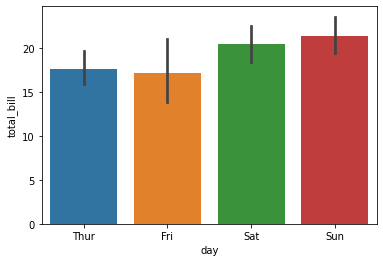

In [30]:
sns.barplot(x="day" , y= "total_bill" ,data =tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

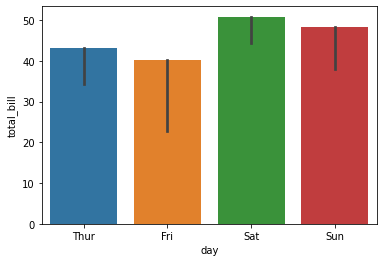

In [34]:
sns.barplot(x="day" , y= "total_bill" ,data =tips,  estimator = np.max) 
#confidence interval = in that interval difference of the values i.e in the 95% of the data, if we take max, we hit the top, the bar is at the highest level

<AxesSubplot:xlabel='day', ylabel='total_bill'>

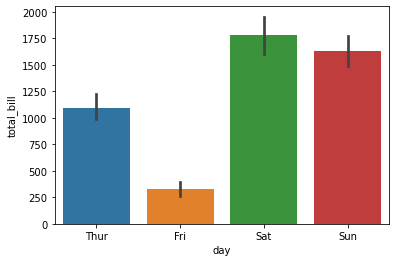

In [35]:
sns.barplot(x="day" , y= "total_bill" ,data =tips,  estimator = np.sum)

**diferences betwen barplot and count plot**

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BOXPLOT</p>

<a id="3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE 01](https://www.khanacademy.org/math/cc-sixth-grade-math/cc-6th-data-statistics/cc-6th-box-whisker-plots/v/constructing-a-box-and-whisker-plot) & [SOURCE 02](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)

As described in the videos, a boxplot display distribution through the use of quartiles and an IQR for outliers.

<AxesSubplot:xlabel='day', ylabel='total_bill'>

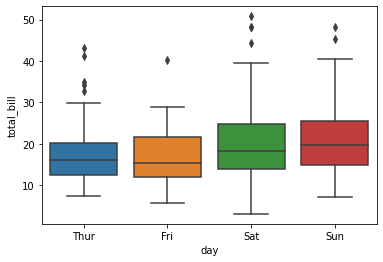

In [36]:
sns.boxplot(data=tips, x="day", y="total_bill")

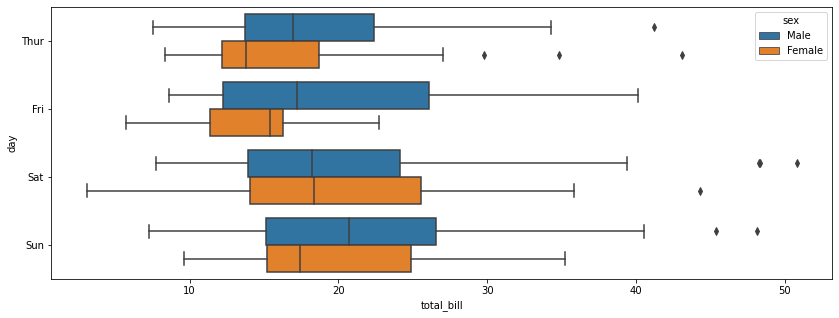

In [40]:
# Orientation
plt.figure(figsize=(14, 5))
sns.boxplot(y='day', x="total_bill", data=tips, hue="sex", orient='h');

In [41]:
df = pd.read_csv("StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='math score', ylabel='parental level of education'>

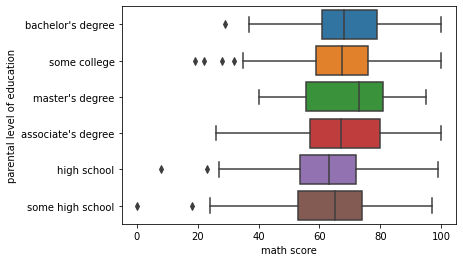

In [42]:
sns.boxplot(x= "math score" , y= "parental level of education" , data =df)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:LEFT; border-radius:10px 10px;">"width" Parameter</p>

<a id="3.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional Boxplot Examples</p>

<a id="3.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

In [9]:
df = pd.read_csv("StudentsPerformance.csv")

df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


<AxesSubplot:xlabel='parental level of education', ylabel='math score'>

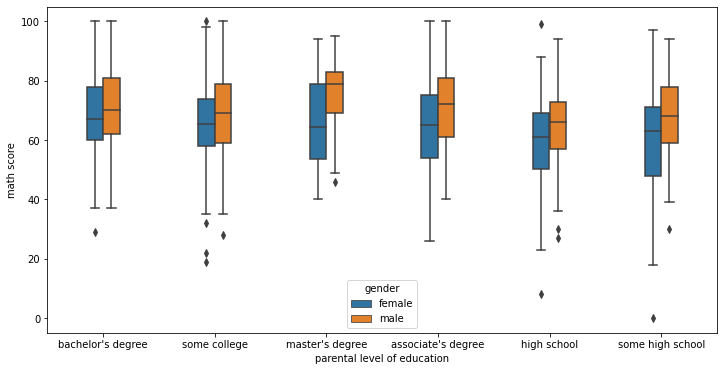

In [49]:
plt.figure(figsize=(12,6))

sns.boxplot(x = "parental level of education" , y="math score" , data =df ,hue="gender" , width = 0.3)

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"orient" Parameter</p>

<a id="3.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Changing x & y</p>

<a id="3.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">VIOLINPLOT</p>

<a id="4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

A violin plot plays a similar role as a box and whisker plot. It shows the distribution of quantitative data across several levels of one (or more) categorical variables such that those distributions can be compared. Unlike a box plot, in which all of the plot components correspond to actual datapoints, the violin plot features a kernel density estimation of the underlying distribution.

In [44]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<AxesSubplot:xlabel='day', ylabel='total_bill'>

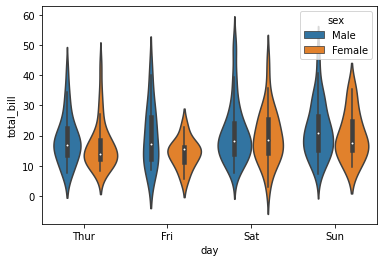

In [50]:
sns.violinplot(x = "day" , y ="total_bill" , hue = "sex", data = tips)

<AxesSubplot:xlabel='day', ylabel='total_bill'>

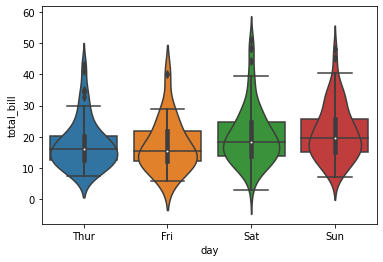

In [54]:
sns.violinplot(x = "day" , y ="total_bill" , data = tips)
sns.boxplot(data = tips, x="day" , y="total_bill")

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optionel Violinplot Example</p>

<a id="4.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"split" Parameter</p>

<a id="4.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

When using hue nesting with a variable that takes two levels, setting split to True will draw half of a violin for each level. This can make it easier to directly compare the distributions.

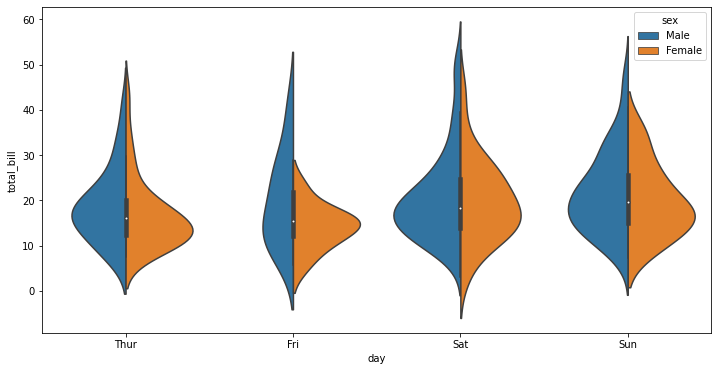

In [55]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"inner" Parameter</p>

<a id="4.3"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

default: inner='box'

Representation of the datapoints in the violin interior. If box, draw a miniature boxplot. If quartiles, draw the quartiles of the distribution. If point or stick, show each underlying datapoint. Using None will draw unadorned violins.

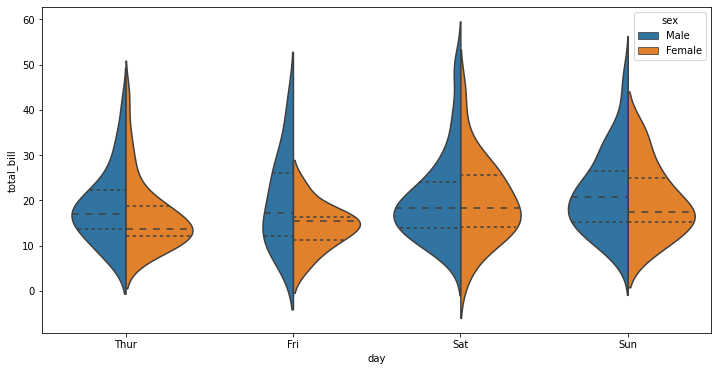

In [56]:
plt.figure(figsize=(12, 6))
sns.violinplot(x='day', y='total_bill', data=tips, hue='sex', split=True, inner="quartile");

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"bandwidth" Parameter</p>

<a id="4.4"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Similar to bandwidth argument for kdeplot

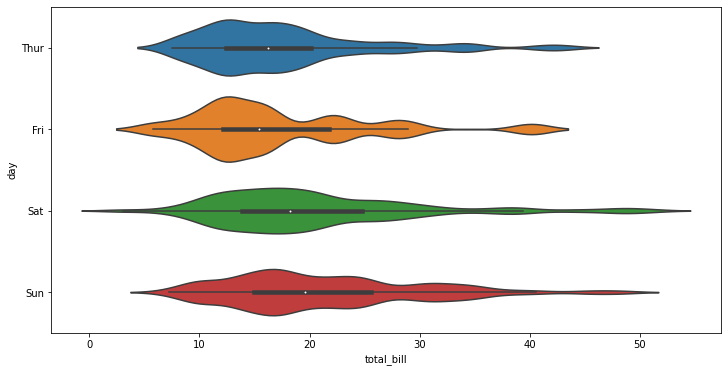

In [57]:
## bandwidth
## Similar to bandwidth argument for kdeplot
plt.figure(figsize=(12, 6))
sns.violinplot(y='day', x="total_bill", data=tips, bw=0.2);

#sensitivity of the code

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Changing x & y</p>

<a id="4.5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:center; border-radius:10px 10px;">SWARMPLOT</p>

<a id="5"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

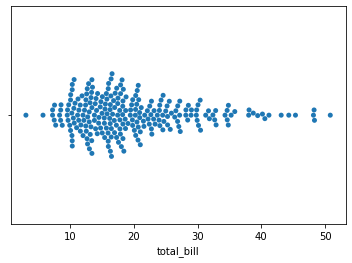

In [62]:
sns.swarmplot(x='total_bill', data=tips);

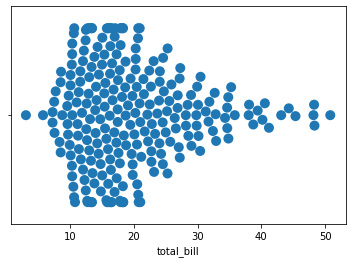

In [65]:
sns.swarmplot(x='total_bill', data=tips, size = 10); #to overcome the overlapping.

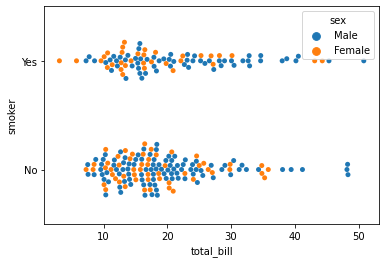

In [60]:
sns.swarmplot(x='total_bill', y ="smoker", hue = "sex" , data=tips);

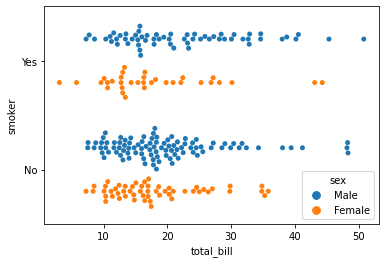

In [61]:
sns.swarmplot(x='total_bill', y ="smoker", hue = "sex" , data=tips ,dodge=True);

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">Optional Swarmplot Example</p>

<a id="5.1"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

### <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:left; border-radius:10px 10px;">"dodge" Parameter</p>

<a id="5.2"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">BOXENPLOT (LETTER-VALUE PLOT)</p>

<a id="6"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

Official Paper on this plot: [Official Paper](https://vita.had.co.nz/papers/letter-value-plot.html)

This style of plot was originally named a “letter value” plot because it shows a large number of quantiles that are defined as “letter values”. It is similar to a box plot in plotting a nonparametric representation of a distribution in which all features correspond to actual observations. By plotting more quantiles, it provides more information about the shape of the distribution, particularly in the tails.

<AxesSubplot:xlabel='math score', ylabel='race/ethnicity'>

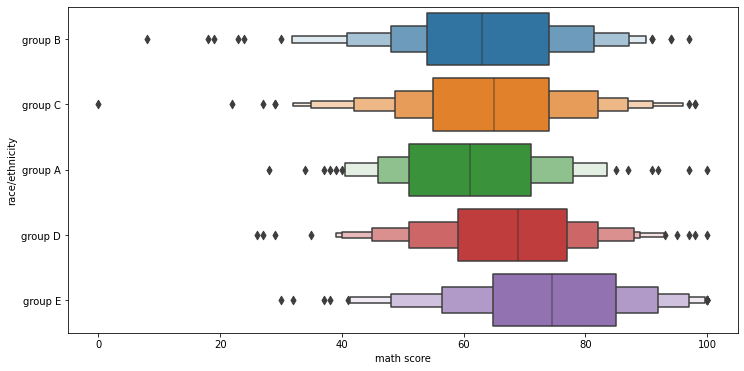

In [67]:
plt.figure(figsize=(12, 6))
sns.boxenplot(data=df, x="math score",y="race/ethnicity")

The box plot shows the median as the centerline (50th percentile), then the 25th and 75th percentile as the box boundaries. Then the IQR method is used to calculate outlier boundaries (1.5 * IQR + Q3 for the upper boundary, for example). Q3 is the 3rd quartile, or 75th percentile of the data (75% of the data is below this value). Outliers outside of the outlier whiskers are shown as distinct points.

Boxenplots (actually called letter-value plots in the original paper and in the lvplot R package) show the distribution differently and are better for bigger datasets. Classic boxplots can have too many outliers and don't show as much information about the distribution. Letter-value plots (boxenplots) start with the median (Q2, 50th percentile) as the centerline. Each successive level outward contains half of the remaining data. So the first two sections out from the centerline contain 50% of the data. After that, the next two sections contain 25% of the data. This continues until we are at the outlier level. Each level out is shaded lighter. There are 4 methods for calculating outliers (described in the paper and available in seaborn). The default is to end up with around 5-8 outliers in each tail.

![Capture13.PNG](https://i.ibb.co/YfpTDg9/Capture13.png)

[SOURCE 01](https://vita.had.co.nz/papers/letter-value-plot.html) & [SOURCE 02](https://stackoverflow.com/questions/52403381/how-boxen-plot-is-different-from-box-plot)

## <p style="background-color:#9d4f8c; font-family:newtimeroman; color:#FFF9ED; font-size:150%; text-align:CENTER; border-radius:10px 10px;">LINEPLOT</p>

<a id="7"></a>
<a href="#toc" class="btn btn-primary btn-sm" role="button" aria-pressed="true" 
style="color:blue; background-color:#dfa8e4" data-toggle="popover">Content</a>

[SOURCE](https://seaborn.pydata.org/generated/seaborn.lineplot.html)

In [72]:
flights = sns.load_dataset("flights")
flights

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


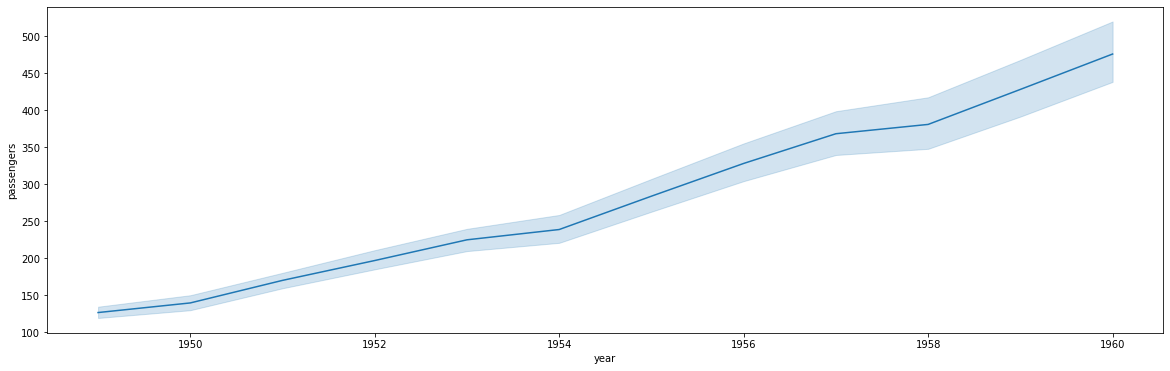

In [73]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='year', y='passengers', data=flights);

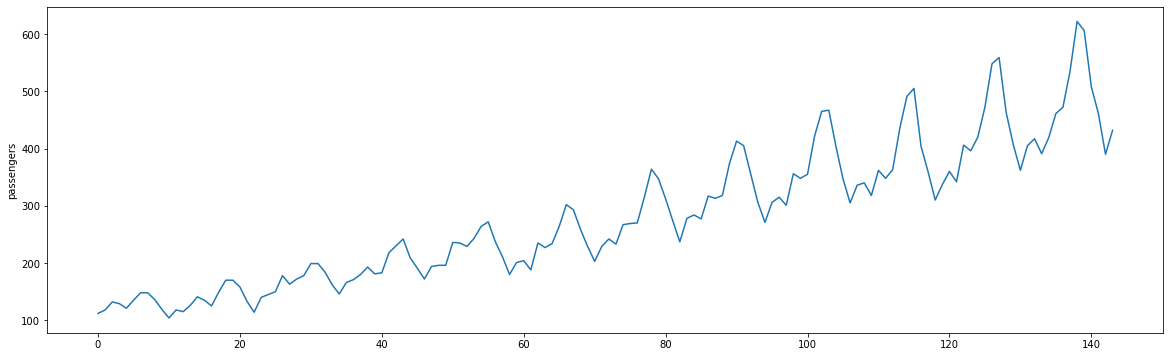

In [74]:
f_sum = flights.groupby(["year", "month"]).sum()
plt.figure(figsize=(20, 6))
sns.lineplot(y=f_sum.passengers , x=f_sum.reset_index().index);

In [75]:
f_sum1 = flights.groupby(["year", "month"]).sum().reset_index()
f_sum1

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121
...,...,...,...
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390


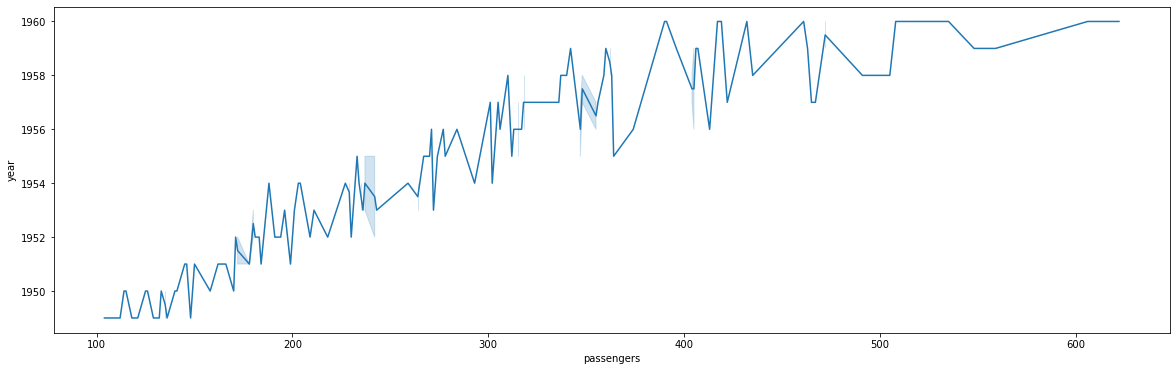

In [76]:
plt.figure(figsize=(20, 6))
sns.lineplot(x=f_sum1.passengers , y=f_sum1.year);

In [77]:
flights_wide = flights.pivot("year", "month", "passengers")
flights_wide

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


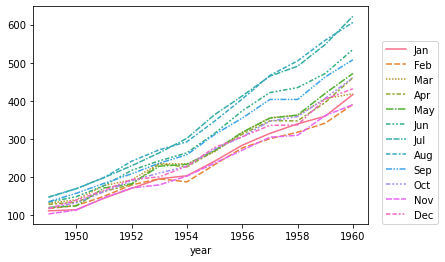

In [78]:
sns.lineplot(data=flights_wide)
plt.legend(loc=(1.04,0))

In [80]:
sns.lineplot(data=flights_wide ,x = "year" , y="passengers" , hue="month")
plt.legend(loc=(1.04,0))

ValueError: Could not interpret value `passengers` for parameter `y`